# Datamining Twitter with tweepy

Twitter is a worldwide database of human sentiment.  About 500 million new tweets go out per day([source](http://www.internetlivestats.com/twitter-statistics/)).  The ability to stream, parse and understand Twitter data at large scale has huge implications for marketing, humanitarian efforts, social sciences and many other ventures.  The combination of Twitter and deep-learning methods like sentimant analysis has lead to platforms like [SocialBro](http://www.socialbro.com/), which mine twitter data to provide in-depth analytics for businesses.  It is even possible to [track the entire emotional state of the world at any given time!](http://wefeel.csiro.au/#/)  As Python developers, we have access to easy-to-use tools to directly communicate with Twitter's data, and this puts a world of data right at our fingertips.

<br>

To make its data available, Twitter hosts a Representational State Transfer Application Programing Interface (REST API).  The API dictates what data twitter makes available, and REST refers to an architectural design pattern for building scalable web services.  These concepts are explained quite well in the video below.

In [132]:
from IPython.display import YouTubeVideo
YouTubeVideo('7YcW25PHnAA')

<br>

Many major webservices use RESTful APIs, so it's important to get familiar with these concepts.  In the video, it was shown how one can interact with an API through the browser itself, or through services like [apigee](http://apigee.com/about/).  However, we can also access the TwitterAPI through Python.  This enables us to integrate Twitter data with other Python resources like `numpy` `matplotlib` and `IPython`.

<br>

There are at least 7 python interfaces to Twitter's REST API.  We will use `tweepy`, since the [documentation is clear](http://www.tweepy.org/), and there are [interesting applications available to get started](http://adilmoujahid.com/posts/2014/07/twitter-analytics/
).

## Installing Tweepy

First you will need to install tweepy.  The most straightforward way is through the `pip` installation tool.  `Python >= 2.7.9` should come installed with pip, but for earlier versions, [see this guide for installing pip](https://pip.pypa.io/en/latest/installing.html).  This can be run from the command line using:

    pip install tweepy
    
or from within a Canopy IPython shell:

    %bash pip install tweepy
    
If you get this Exception:

    TypeError: parse_requirements() got an unexpected keyword argument 'session'


Make sure you upgrade pip to the newest version:

    pip install --upgrade pip
    
Alternatively, you can install `tweepy` from source by doing the following:

   - Go to the [tweepy repo](https://github.com/tweepy/tweepy)
   - Click *Download Zip*
   - Extract to a known directy (eg /path/to/Desktop)
   - Open a terminal and `cd` into that folder
   - Type `python setup.py install`


### Intro

Twitter uses the [OAuth protocol](https://dev.twitter.com/oauth/overview/faq) for secure application development.  Considering all of the applications that access Twitter (for example, using your Twitter account to login to a different website), this protocol prevents information like your password being passed through these intermediate accounts.  While this is a great security measure for intermediate client access, it adds an extra step for us before we can directly communicate with the API.  To access Twitter, you need to Create an App (https://apps.twitter.com); however, I've already created an app that we can all ping from: `GWU_TEST_APP`.   To interact with `GWU_TEST_APP`, you'll need an access token.  

<br>

[Request an access token here.](https://apps.twitter.com/app/7965526/keys)

<br>

Store your consumer key and comumer secret somewhere you'll remember them.  I'm storing mine in Python strings, but for security, not displaying this step:

    consumer_key = 'jrCYD....'
    consumer_secret = '...' 
    

Here is a discussion on the difference between the access token and the consumer token; although, for our intents and purposes, its not so important: http://stackoverflow.com/questions/20720752/whats-the-difference-between-twitter-consumer-key-and-access-token**

```
The consumer key is for your application and client tokens are for end users in your application's context. If you want to call in just the application context, then consumer key is adequate. You'd be rate limited per application and won't be able to access user data that is not public. With the user token context, you'll be rate limited per token/user, this is desirable if you have several users and need to make more calls than application context rate limiting allows. This way you can access private user data. Which to use depends on your scenarios.
```

## Example 1: Read Tweets Appearing on Homepage

With the `consumer_key` and `consumer_secret` stored, let's try a Hello World example from Tweepy's docs.  This will access the public tweets appearing on the User's feed as if they had logged in to twitter.  **For brevity, we'll only print the first two**.

In [2]:
import tweepy

consumer_key = 'jrCYD9dREozKRfchtkm6zg02Z'
consumer_secret = 'h0cWbg5TeV2AS1n5w33ZwALEQcS4JkC2rpOXNfIImOHL8hdFLg'

access_token ='718576069-CGK0f03Q94CkFysA6OJgJZeRBef2AGIh1bzceVl4'
access_token_secret = 'zdOaZWEncust1rFGKAWaj462VRUD6GMcU60plkCaobfEf'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for (idx, tweet) in enumerate(public_tweets[0:3]): #First 3 tweets in my public feed
    print 'TWEET %s:\n\n\t%s\n\n' % (idx, tweet.text)

TWEET 0:

	RT @NeuroDebian: Amazinly enriched #sklearn release (0.16.0) is now available!


TWEET 1:

	Why no OMG #AprilFools? a) cos we're getting old *grumble*, and b) because we'll never top making http://t.co/f8VmpBYdVF our homepage.


TWEET 2:

	RT @DebianUpload: New upload: Accepted scikit-learn 0.16.0-1 (source all amd64) into experimental by Yaroslav Halchenko... http://t.co/1Wyg…




When we used `tweet.text`, we implicitly used a python class defined by `tweepy`.

In [3]:
type(tweet)

tweepy.models.Status

There are many attributes associated with a `Status` object.  

In [4]:
tweet.__dict__.keys()

['contributors',
 'truncated',
 'text',
 'in_reply_to_status_id',
 'id',
 'favorite_count',
 '_api',
 'author',
 '_json',
 'coordinates',
 'entities',
 'in_reply_to_screen_name',
 'id_str',
 'retweet_count',
 'in_reply_to_user_id',
 'favorited',
 'retweeted_status',
 'source_url',
 'user',
 'geo',
 'in_reply_to_user_id_str',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang',
 'created_at',
 'in_reply_to_status_id_str',
 'place',
 'source',
 'retweeted']

## Example 2: What's trending where?

According to the [tweepy API](http://tweepy.readthedocs.org/en/v3.2.0/api.html), we can return the top 10 trending topics for a specific location, where the location is a `WOEID (Yahoo Where on Earth ID)`. 

<br>

The WOEID is a unique identifier, similar to zipcodes, but that expand worldwide.  For example, my hometown of Pittsburgh has a WOEID of 2473224.  You can search for WOEID's here: http://woeid.rosselliot.co.nz/

<br>

Let's return the top ten trending topics in Pittsburgh

In [5]:
top10 = api.trends_place(id=2473224)
top10

[{u'as_of': u'2015-04-01T00:44:12Z',
  u'created_at': u'2015-04-01T00:37:12Z',
  u'locations': [{u'name': u'Pittsburgh', u'woeid': 2473224}],
  u'trends': [{u'name': u'#callmejacob',
    u'promoted_content': None,
    u'query': u'%23callmejacob',
    u'url': u'http://twitter.com/search?q=%23callmejacob'},
   {u'name': u'#TheFlash',
    u'promoted_content': None,
    u'query': u'%23TheFlash',
    u'url': u'http://twitter.com/search?q=%23TheFlash'},
   {u'name': u'#DazedAndConfusedVideo',
    u'promoted_content': None,
    u'query': u'%23DazedAndConfusedVideo',
    u'url': u'http://twitter.com/search?q=%23DazedAndConfusedVideo'},
   {u'name': u'#MME15',
    u'promoted_content': None,
    u'query': u'%23MME15',
    u'url': u'http://twitter.com/search?q=%23MME15'},
   {u'name': u'#transdayofvisibility',
    u'promoted_content': None,
    u'query': u'%23transdayofvisibility',
    u'url': u'http://twitter.com/search?q=%23transdayofvisibility'},
   {u'name': u'Martha Stewart',
    u'promoted_

The result is a `JSON` object.  JSON is a human and machine-readable standardized data encoding format.  

<br>

In Python, JSON objects are implemented as lists of nested dictionaries.  JSON stands for JavaScript Object Notation, because it's designed based on a subset of the JavaScript language; however, JSON is a data-encoding format implemented in many languages.  

<br>

Looking at this structure, we see that it's contained in a list; in fact its a list of one element.  Let's access the top ten tweet names:

In [6]:
top10[0]['trends']

[{u'name': u'#callmejacob',
  u'promoted_content': None,
  u'query': u'%23callmejacob',
  u'url': u'http://twitter.com/search?q=%23callmejacob'},
 {u'name': u'#TheFlash',
  u'promoted_content': None,
  u'query': u'%23TheFlash',
  u'url': u'http://twitter.com/search?q=%23TheFlash'},
 {u'name': u'#DazedAndConfusedVideo',
  u'promoted_content': None,
  u'query': u'%23DazedAndConfusedVideo',
  u'url': u'http://twitter.com/search?q=%23DazedAndConfusedVideo'},
 {u'name': u'#MME15',
  u'promoted_content': None,
  u'query': u'%23MME15',
  u'url': u'http://twitter.com/search?q=%23MME15'},
 {u'name': u'#transdayofvisibility',
  u'promoted_content': None,
  u'query': u'%23transdayofvisibility',
  u'url': u'http://twitter.com/search?q=%23transdayofvisibility'},
 {u'name': u'Martha Stewart',
  u'promoted_content': None,
  u'query': u'%22Martha+Stewart%22',
  u'url': u'http://twitter.com/search?q=%22Martha+Stewart%22'},
 {u'name': u'Rolling Stones',
  u'promoted_content': None,
  u'query': u'%22Roll

As you can see, there's alot of metadata that goes into even a simple tweet.  Let's cycle through each of these trends, and print the `name` and website of each.

In [7]:
for trend in top10[0]['trends']:
    print trend['name'], trend['url']

#callmejacob http://twitter.com/search?q=%23callmejacob
#TheFlash http://twitter.com/search?q=%23TheFlash
#DazedAndConfusedVideo http://twitter.com/search?q=%23DazedAndConfusedVideo
#MME15 http://twitter.com/search?q=%23MME15
#transdayofvisibility http://twitter.com/search?q=%23transdayofvisibility
Martha Stewart http://twitter.com/search?q=%22Martha+Stewart%22
Rolling Stones http://twitter.com/search?q=%22Rolling+Stones%22
April Fools http://twitter.com/search?q=%22April+Fools%22
Big Gay http://twitter.com/search?q=%22Big+Gay%22
Casey Jones http://twitter.com/search?q=%22Casey+Jones%22


### Example 3: Search

We can mine `tweets` using either *search* or *stream*.  

<br>

**The key difference between stream and search is that stream provides new data as it comes in, while search can be used to query old data.**  The search API is more powerful for queries, and provides faster access to a wide-range of data.  Check out this [1400DEV for more about search vs. stream](http://140dev.com/twitter-api-programming-tutorials/aggregating-tweets-search-api-vs-streaming-api/).  

<br>

Before going forward, you can try doing some searches through Twitter's website.

https://twitter.com/search-advanced

<br>


Twitter employs a special query language, so a query like "traffic?" will return tweets that contain the word traffic and are phrased as a question.  [Check it out here](https://dev.twitter.com/rest/public/search).

<br>

Search is implemented directly through `tweepy.api`.  Let's search for a single tweet about traffic, phrased as a question. 

In [81]:
results = api.search(q='traffic?', count=1)
print type(results)

<class 'tweepy.models.SearchResults'>


The result is a `tweepy.models.SearchResults` class (Check out all of tweepy's models [here](https://github.com/tweepy/tweepy/blob/master/tweepy/models.py).
).  Rather than just dumping a bunch of JSON data on us, the `tweepy api` has decoded the JSON and put it into a more pythonic object.  So for example, we can access the message in the tweet via python attribute access. 

In [105]:
print 'CREATED: %s\n%s\n\n' % (results[0].created_at, results[0].text)

CREATED: 2015-04-01 01:40:03
http://t.co/t7peZy8SGG do you need website traffic hits? #socialmedianinja #viralmarketing #viralservices #branding




Let's find 5 tweets that contains the word "beefsteak" near Washington DC.   We can provide this as a `geocode`, a lattitude, longitude and radius string, which I looked up for GWU on Google Maps.  We can also specify how far back to look in time; in this case, don't show anything prior to 3/25/2015.  

In [125]:
for tweet in api.search(q='beefsteak since:2015-3-25', count=5, show_user=False,
                        geocode='38.899722,-77.048363,5mi'):
    print tweet.created_at, '\n',  tweet.text, '\n\n'

2015-03-30 16:56:50 
@porquejorge @beefsteak toss in the salmon, avocado or soft boiled egg. Def helps. 


2015-03-30 16:39:48 
ICYMI: @beefsteak beats out @sweetgreen. But why? https://t.co/9iaQqJ8axc http://t.co/g93OdDBAEn 


2015-03-30 00:17:26 
Beefsteak and veggies in olive oil. Posted on #myPaleoPal --&gt; http://t.co/psmNweZ4VD http://t.co/i3CrNzn6fJ 


2015-03-29 20:32:01 
Tasty veggie vittles at José Andrés new spot - beefsteak @ Beefsteak https://t.co/ye9hfcxiG2 


2015-03-29 16:56:51 
Obvi (at @Beefsteak in Washington, DC) https://t.co/jg8J2XusO5 




In [134]:
for tweet in api.search(q='obama', count=500, show_user=False, rpp=500,
                        geocode='38.899722,-77.048363,500mi'):
    print tweet.created_at, '\n',  tweet.text, '\n\n'

2015-04-01 16:42:28 
"@JonahMarais: me and Michelle Obama are dating guys"
Lot twist. 
Its April fools day. 😂 


2015-04-01 16:42:05 
"@JonahMarais: me and Michelle Obama are dating guys"
SIKE. 


2015-04-01 16:38:44 
Forget #WinstonChurchill #Obama isn't measuring up to #NevilleChamberlain says http://t.co/6JZqXjUdRH #IranTalks #Israel 


2015-04-01 16:34:41 
One of the few times #Obama didn't vote present as Illinois state senator was when he voter FOR their #RFRA law!
🇺🇸✨ http://t.co/TziIDKabr9 


2015-04-01 16:27:35 
I was pointing out #obama was a liar long before this!

#WakeUpAmerica🙏
#tcot✨
#Patriots🇺🇸

http://t.co/9aEHL19dn8 


2015-04-01 16:20:19 
“@thehill: Obama vetoes GOP bill on union elections: http://t.co/AQGSHa7c5b http://t.co/qrQSE1TsAv” @AFSCME @DistCouncil37 @CentralLaborNYC 


2015-04-01 16:19:09 
"McConnell Is Telling Other Countries Not To Trust Obama’s Climate Plan" http://t.co/nX1wAbkXem #political #feedly #traitor! 


2015-04-01 16:10:21 
"@HellOfAPrez: RT @to

## Example 4: Streaming and Data Mining

*This Streaming tutorial follows closely [Adil Moujahid's great tweepy examples](http://adilmoujahid.com/posts/2014/07/twitter-analytics/)*

<br>

Twitter offers a [Streaming API](https://dev.twitter.com/streaming/overview) to make it easier to query streams of tweets.  The Stream API encapsulates some pain points of REST access to ensure that Stream calls don't exceed the rate limit.  Think of them as Twitter's suggested means to stream data for beginners.  You don't have to use them, but they're recommended and will make life easier.  There are three stream types:

   - `Public Streams:` Streams of public data flowthing through Twitter.  Suitable for followign specific users, topics or for data mining.
    
   - `User Streams:` Single-user streams.  Containing roughly all of the data corresponding with a single user's view of Twitter.
    
   - `Site Streams:`  The multi-user version of user streams.  
   
<br>
    
We'll resist the temptation to mess with our friend's Twitter accounts, and focus soley on `Public Streams`.  Combining these stream with text filters will let us accumulate content.  For example, we could look for tweets involving the text, *foxnews*.  `tweepy` and `Twitter's API` will configure the stream and filter to work nicely, you just provide the content tags you're interested in.  Finally, **remember that the more obsucre the content, the longer it will take to find**.

<br>

**<font color='red'>The following snippet will run until `max_tweets` or `max_seconds` is reached.  If running in notebook, it will hold up cells until the alotted time.  Therefore, for long runtimes, you may want to run in an external python program, and then can terminate at will if desired.  I also recommend restarting notebook kernal before running this cell multiple times...</font>**  

In [8]:
#Import the necessary methods from tweepy library
import sys
import time
import datetime

from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#This is a basic listener that just prints received tweets to stdout.
class StreamParser(StreamListener):
    """ Controls how streaming data is parsed. Pass an outfile, or data will be writting to 
    sys.stdout (eg the screen)
    """
    def __init__(self, outfile=None, max_tweets=5, max_seconds=30):
        self.counter = 0
        self.start_time = time.time()
        # Set upper limits on maximum tweets or seconds before timeout
        self.max_tweets = max_tweets
        self.max_seconds = max_seconds
        if outfile:
            self.stdout = open(outfile, 'w')
        else:
            self.stdout = sys.stdout
    
    def on_data(self, data):
        """ Data is a string, but formatted for json. Parses it"""
        self.counter += 1
        # time data is all timestamps.
        current_time = time.time()
        run_time = current_time - self.start_time
                
        # If we want to read time, easiest way is to convert from timestamp using datetime
        formatted_time = datetime.datetime.now()
            
        # Technically, might not be the best place to put kill statements, but works well enough
        if self.max_tweets:
            if self.counter > self.max_tweets:
                self._kill_stdout()
                raise SystemExit('Max tweets of %s exceeded.  Killing stream... see %s' \
                             % (self.max_tweets, self.stdout))
  
        if self.max_seconds:
            if run_time > self.max_seconds:
                self._kill_stdout()
                raise SystemExit('Max time of %s seconds exceeded.  Killing stream... see %s' \
                                 % (self.max_seconds, self.stdout))

        print 'Tweet %s at %s.\nEllapsed: %.2f seconds\n' % \
             (self.counter, formatted_time, run_time)

        # Write to file, return True causes stream to continue I guess...
        self.stdout.write(data)
        return True

    def _kill_stdout(self):
        """ If self.stdout is a file, close it.  If sys.stdout, pass"""
        if self.stdout is not sys.stdout:
            self.stdout.close() 
    
    def on_error(self, status):
        print status


#This handles Twitter authetification and the connection to Twitter Streaming API
auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

# Stream 10 tweets, no matter the time it takes!
listener = StreamParser(outfile='obama_putin.txt', max_tweets=5000, max_seconds=None)
stream = Stream(auth, listener)

#This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
stream.filter(track=['obama', 'putin'])

Tweet 1 at 2015-03-31 19:49:09.119834.
Ellapsed: 0.65 seconds

Tweet 2 at 2015-03-31 19:49:13.419011.
Ellapsed: 4.95 seconds

Tweet 3 at 2015-03-31 19:49:16.449451.
Ellapsed: 7.98 seconds

Tweet 4 at 2015-03-31 19:49:16.558069.
Ellapsed: 8.09 seconds

Tweet 5 at 2015-03-31 19:49:16.731221.
Ellapsed: 8.26 seconds

Tweet 6 at 2015-03-31 19:49:18.492734.
Ellapsed: 10.02 seconds

Tweet 7 at 2015-03-31 19:49:22.570909.
Ellapsed: 14.10 seconds

Tweet 8 at 2015-03-31 19:49:22.837947.
Ellapsed: 14.37 seconds

Tweet 9 at 2015-03-31 19:49:23.105497.
Ellapsed: 14.64 seconds

Tweet 10 at 2015-03-31 19:49:23.619192.
Ellapsed: 15.15 seconds



SystemExit: Max tweets of 10 exceeded.  Killing stream... see <closed file 'test.txt', mode 'w' at 0x7f1356b2ac00>

To exit: use 'exit', 'quit', or Ctrl-D.


### How is Python translated into REST?

`stream.filter()`, which actually returned the tweets, is a method of the class `tweepy.Stream`.  `Stream` provides a Python to frontend, and on the backend sends HTTP requests to Twitter [as described here](https://dev.twitter.com/streaming/overview/request-parameters).  We could have avoided Python altogether and just sent HTTP requests directly, but this is laborious.

<br>

Because `tweepy` is open-source, we can look at the source code for the `Stream` class, [here](https://github.com/tweepy/tweepy/blob/master/tweepy/streaming.py#L179).  Specifically, let's try to understand what the `filter` method is doing.  Let's look at the `filter` source code explicitly:

    def filter(self, follow=None, track=None, async=False, locations=None,
                stall_warnings=False, languages=None, encoding='utf8'):
  
        self.body = {}
        self.session.headers['Content-type'] = "application/x-www-form-urlencoded"
        if self.running:
            raise TweepError('Stream object already connected!')
        self.url = '/%s/statuses/filter.json' % STREAM_VERSION
        if follow:
            self.body['follow'] = u','.join(follow).encode(encoding)
        if track:
            self.body['track'] = u','.join(track).encode(encoding)
        if locations and len(locations) > 0:
            if len(locations) % 4 != 0:
                raise TweepError("Wrong number of locations points, "
                                 "it has to be a multiple of 4")
            self.body['locations'] = u','.join(['%.4f' % l for l in locations])
        if stall_warnings:
            self.body['stall_warnings'] = stall_warnings
        if languages:
            self.body['language'] = u','.join(map(str, languages))
        self.session.params = {'delimited': 'length'}
        self.host = 'stream.twitter.com'
        self._start(async)
        
        
<br>

Essentially, keywords like `track` and `locations` can be used to customize what types of tweets are streamed.  `tweepy` translates these into a series of `HTTP requests` and sends them to the TwitterAPI.  For example, we can see how `track` is interpreted by the [Twitter RESTAPI here](https://dev.twitter.com/streaming/overview/request-parameters#track).  

### Loading streamed data

While `search` returned python objects, `stream` returns raw `JSON` data.  The `search API` translated JSON data into more convienent [python objects](https://github.com/tweepy/tweepy/blob/master/tweepy/models.py); however, to parse the Stream data, we'll have to work with JSON data directly.  This is a good exercise, because JSON is widely used and its important to get familiar with.

<br>

If only one tweet were saved, we could just use json.loads() to read it in right away, but
for a file with multiple tweets, we need to [read them in one at a time](http://stackoverflow.com/questions/21058935/python-json-loads-shows-valueerror-extra-data). 

<br>

Each tweet JSON object is one long line, so we can read in line by line, until an error is reached in which case we just stop.  For example:

In [11]:
import json

tweets = []
for line in open('test.txt', 'r'):
    tweets.append(json.loads(line))

In [12]:
len(tweets)

10

The tweet text itself is embedded in the `text` metadata field

In [13]:
tweets[0]['text']

u'Sexy guitar on "Tim\'s Drugs" by UMAMI: http://t.co/H257xSR7Gu'

Check out all of the metadata you can get from a tweet! 

In [14]:
sorted(tweets[0].keys())

[u'contributors',
 u'coordinates',
 u'created_at',
 u'entities',
 u'favorite_count',
 u'favorited',
 u'filter_level',
 u'geo',
 u'id',
 u'id_str',
 u'in_reply_to_screen_name',
 u'in_reply_to_status_id',
 u'in_reply_to_status_id_str',
 u'in_reply_to_user_id',
 u'in_reply_to_user_id_str',
 u'lang',
 u'place',
 u'possibly_sensitive',
 u'retweet_count',
 u'retweeted',
 u'source',
 u'text',
 u'timestamp_ms',
 u'truncated',
 u'user']

Within these fields, there's even more information.  For example, the `user` and `entities` fields, which provide information about the `user` as well as links and images (entities) embedded in the tweet:

In [15]:
tweets[0]['user']

{u'contributors_enabled': False,
 u'created_at': u'Fri Aug 30 17:45:50 +0000 2013',
 u'default_profile': True,
 u'default_profile_image': False,
 u'description': u"Heavy Dirty Sexy Bluesy Catastrophic Rock'N'Roll. Check out our FB page: http://www.facebook.com/HotDamnMPLS",
 u'favourites_count': 1,
 u'follow_request_sent': None,
 u'followers_count': 280,
 u'following': None,
 u'friends_count': 1269,
 u'geo_enabled': True,
 u'id': 1713300498,
 u'id_str': u'1713300498',
 u'is_translator': False,
 u'lang': u'en',
 u'listed_count': 3,
 u'location': u'Minneapolis, MN',
 u'name': u'Hot Damn!',
 u'notifications': None,
 u'profile_background_color': u'C0DEED',
 u'profile_background_image_url': u'http://abs.twimg.com/images/themes/theme1/bg.png',
 u'profile_background_image_url_https': u'https://abs.twimg.com/images/themes/theme1/bg.png',
 u'profile_background_tile': False,
 u'profile_banner_url': u'https://pbs.twimg.com/profile_banners/1713300498/1398471019',
 u'profile_image_url': u'http://pb

In [16]:
tweets[0]['entities']

{u'hashtags': [],
 u'symbols': [],
 u'trends': [],
 u'urls': [{u'display_url': u'fb.me/3Y2GKQxC6',
   u'expanded_url': u'http://fb.me/3Y2GKQxC6',
   u'indices': [39, 61],
   u'url': u'http://t.co/H257xSR7Gu'}],
 u'user_mentions': []}

Check out this infographic on all of the metadata in a tweet, taken from [Slaw: Canada's online legal magazine](http://www.slaw.ca/2011/11/17/the-anatomy-of-a-tweet-metadata-on-twitter/).  Is this ethical?

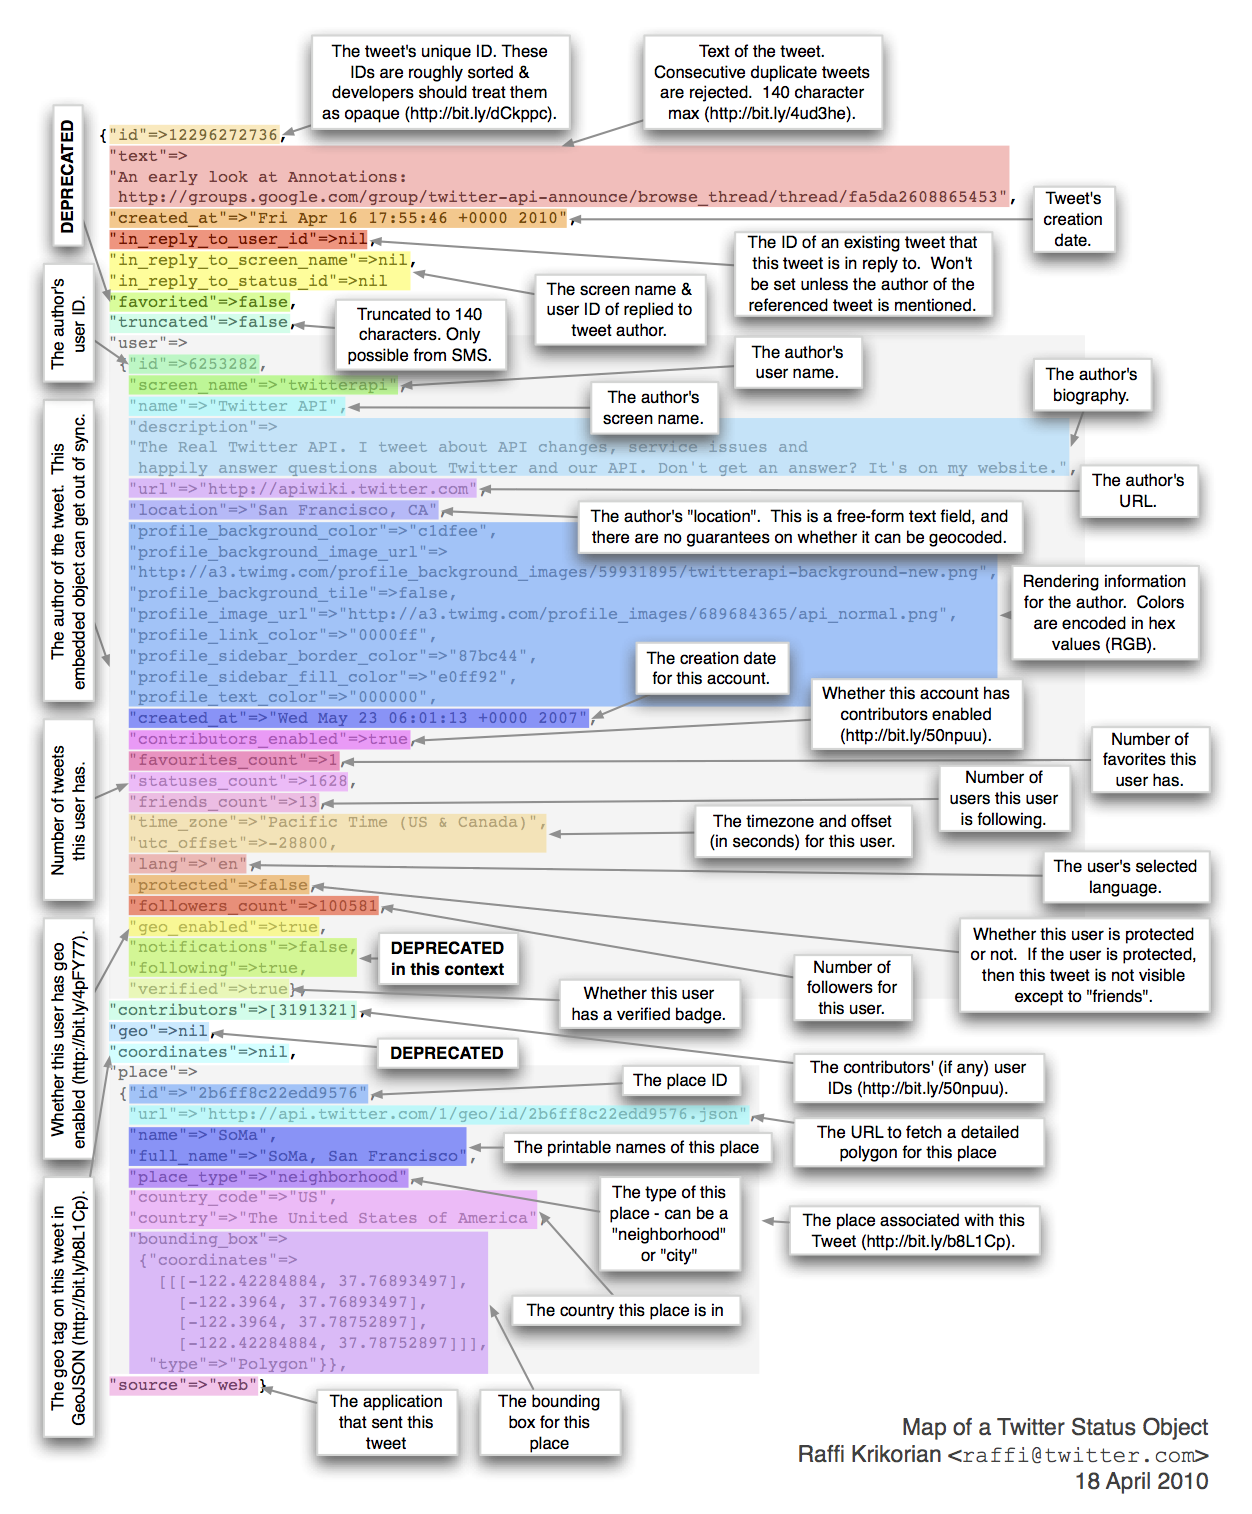

In [22]:
from IPython.display import Image

Image('http://www.slaw.ca/wp-content/uploads/2011/11/map-of-a-tweet-copy.png')

### 

### Deep Learning and Natural Language Processing

Deep Learning is an avenue to artificial intelligence, enabling computers to process unstructured data (images, text articles, tweets, comments and complaints etc...), and try to infer high-level information.  For example, is this customer upset?  Or, does this image have a cat in it?  Such inquiries are easy for the human brain, but very difficult for computers.  Deep Learning is opening the door for "smart" applications, and is poised to lead us into another tech revolution?  Don't beleive me, then check this out:

In [137]:
YouTubeVideo('07XPEqkHJ6U')

You don't need a PhD in Baysian Statistics anymore to have access to powerful deep learning frameworks.  Platforms like [Google Predicion](https://cloud.google.com/prediction/docs) and [IBM Watson](http://www.ibm.com/smarterplanet/us/en/ibmwatson/) are bringing this highly technical field into the mainstream.  I'm actually a big fan of small Denver company called [AlchemyAPI](http://www.alchemyapi.com/).  

<br>

<img src="http://www.svethardware.cz/ibm-koupilo-alchemyapi-jako-doplnek-pro-watsona/40125/img/body-0.44D4/logo-alchemyapi.jpg" alt="HTML5 Icon">

<br>

AlchemyAPI offers some very cool services for natural language processing and computer vision, and they're very accessible through Python.  Therefore, we'll focus on Alchemy's tools as an avenue into this very interesting field of deep learning, and show how we can use them in conjunction with Tweets, and other forms of unstructured data.  First, I'd strongly encourage you to watch the first 20 minutes or so of this video about deep learning.

In [135]:
YouTubeVideo('kXW7QfcOCXA')

#### Alchemy Demos

There are several 3 cool demo applications available on [Alchemy's website](http://www.alchemyapi.com/products/demo).  Try them all out before we dive into the Python SDK.  The demos include:

   - `AlchemyLanguage` : A comprehensive tool for semantic analysis, capable of sentiment analysis, entitity extraction, and many other cool things.

   - `AlchemyVision`: Object extraction from images (eg this image contains a cat)

   - `FacialRecognition` : Identifying faces, recognizing celebrities, estimating age and gender.
   
<br>   
   
We'll focus on Language processing, but I strongly encourage you to check out the image demos, and below is a screenshot of the facial recognition demo.  From just images, the software identifies the facial region (if it belongs to a notable person, their information is recovered), and estimates the gender and age.  **I did a full demo on facial recognition comparing normal people to game of thrones and other celebrities using this tool in Python.  [Check it out here](http://nbviewer.ipython.org/github/hugadams/twitter_play/blob/master/FACESANDFRIENDS.ipynb)**

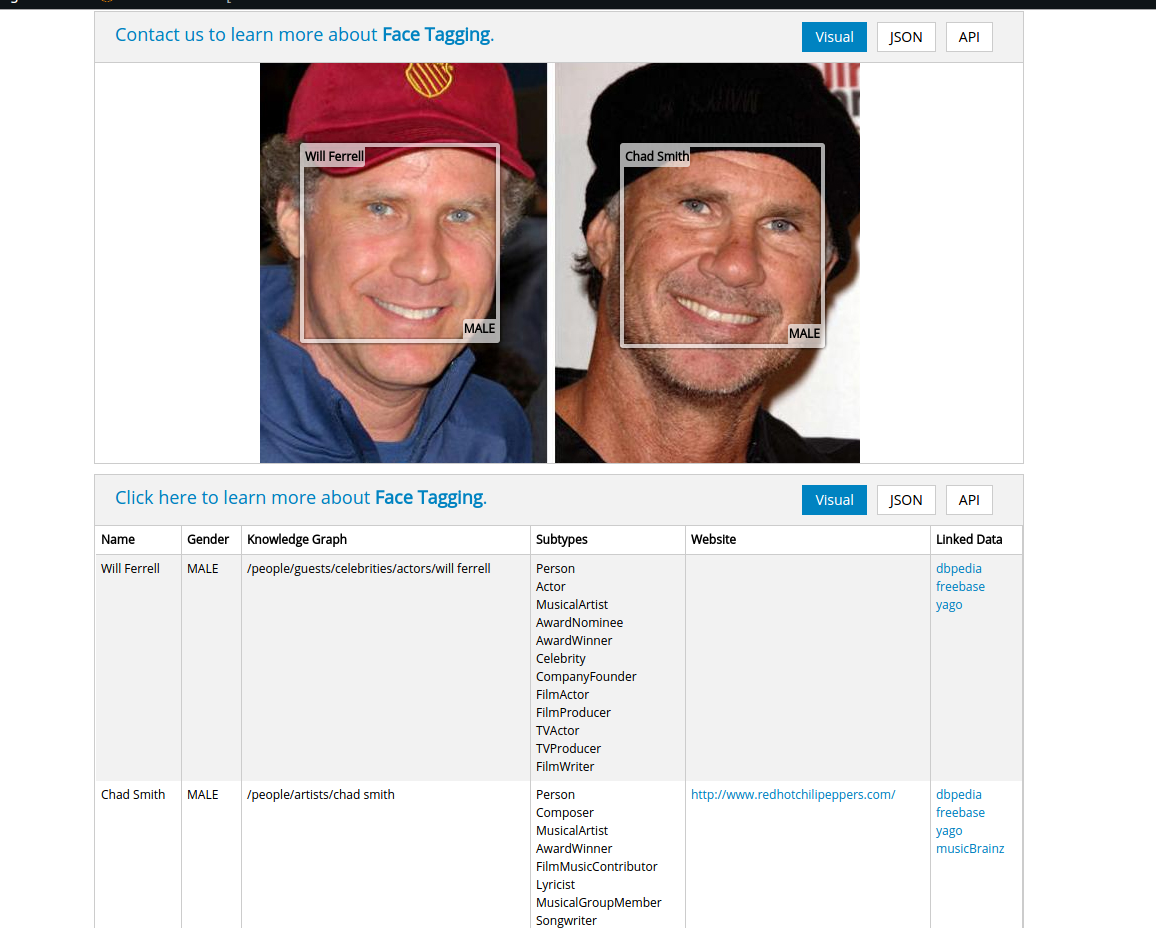

In [140]:
from IPython.display import Image 

Image('alch_faces.png')

#### Natural Language Processing

Natural language processing (NLP) is at the intersection of computer science and linguinstics- essentially having computers understand language in the way that humans can.  AlchemyLanguage integrates many NLP concenpts into a single, easy to use framework.  Their [demo](http://www.alchemyapi.com/products/demo/alchemylanguage) provides a dashboard to many NLP predictions including [sentiment](http://www.alchemyapi.com/products/alchemylanguage/sentiment-analysis) (how does this article make me feel), [entities](http://www.alchemyapi.com/products/alchemylanguage/entity-extraction) (who or what is specifically noteable in this article), [taxonomy](http://www.alchemyapi.com/products/alchemylanguage/taxonomy) (what categories of information are in the article).

<br>

Below is a screenshow from the analysis of a news article, *U.S. stocks rise with help form Apple Inc. -MarketWatch*.  The entities are organized into a slick visual, and colored by positive, negative or neutral sentiment.  The sentiment scores for each entity are shown underneath.  Other NLP categories like taxonomy are available on the side panel.  I've posted a screenshot below, [but please try it for yourself](http://www.alchemyapi.com/products/demo/alchemylanguage)!

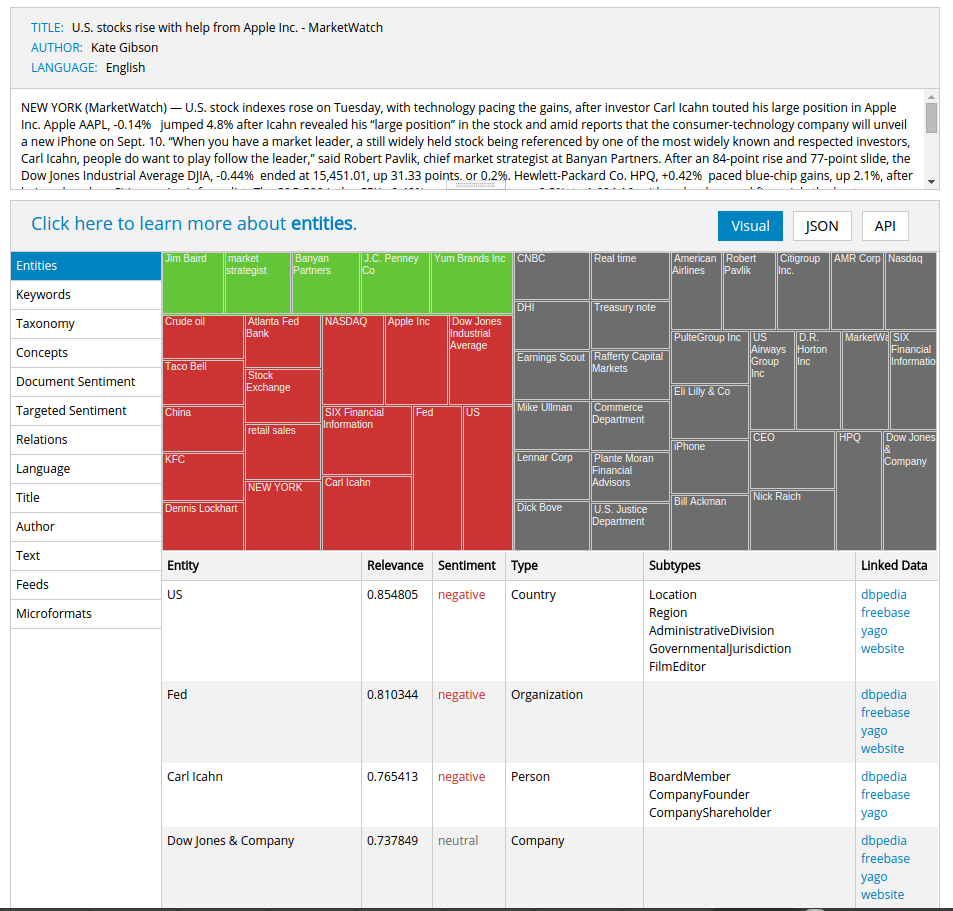

In [141]:
Image('alch_nlp.png')

In [17]:
import os
os.chdir('/home/glue/Desktop/alchemyapi_python/')
from alchemyapi import AlchemyAPI as alcapi
from types import MethodType

ALCAPI = alcapi() #<-- Instantiate
print 'The available attributes and methods for Alchemy API are:\n' 
sorted(alcapi.__dict__.keys())

The available attributes and methods for Alchemy API are:



['BASE_URL',
 'ENDPOINTS',
 '_AlchemyAPI__analyze',
 '__doc__',
 '__init__',
 '__module__',
 'author',
 'category',
 'combined',
 'concepts',
 'entities',
 'faceTagging',
 'feeds',
 'imageExtraction',
 'imageTagging',
 'keywords',
 'language',
 'microformats',
 'relations',
 's',
 'sentiment',
 'sentiment_targeted',
 'taxonomy',
 'text',
 'text_raw',
 'title']

In [18]:
help(alcapi.sentiment)

Help on method sentiment in module alchemyapi:

sentiment(self, flavor, data, options={}) unbound alchemyapi.AlchemyAPI method
    Calculates the sentiment for text, a URL or HTML.
    For an overview, please refer to: http://www.alchemyapi.com/products/features/sentiment-analysis/
    For the docs, please refer to: http://www.alchemyapi.com/api/sentiment-analysis/
    
    INPUT:
    flavor -> which version of the call, i.e. text, url or html.
    data -> the data to analyze, either the text, the url or html code.
    options -> various parameters that can be used to adjust how the API works, see below for more info on the available options.
    
    Available Options:
    showSourceText -> 0: disabled (default), 1: enabled
    
    OUTPUT:
    The response, already converted from JSON to a Python object.



In [19]:
FOXARTICLE = 'http://www.foxnews.com/us/2015/02/24/southern-california-commuter-train-crashes-into-truck-injuries-reported/'
GOODARTICLE = 'http://www.goodnewsnetwork.org/company-gives-employees-1000-job-well-done/'

badnews = ALCAPI.sentiment('url', FOXARTICLE)
goodnews = ALCAPI.sentiment('url', GOODARTICLE)

print 'Article from fox news:\n\t', badnews['docSentiment']
print '\n'
print 'Article from goodnews news:\n\t', goodnews['docSentiment']

Article from fox news:
	{u'mixed': u'1', u'score': u'-0.411184', u'type': u'negative'}


Article from goodnews news:
	

KeyError: 'docSentiment'

### Image Extraction

In [ ]:
from IPython.display import Image
image_extract = ALCAPI.imageExtraction('url', GOODARTICLE)

# Use ipython's display system to render the image
Image(image_extract['image'])

Looks like it found an ad on the page, not the actual main image.  Let's try the "always infer" option which is supposed to be more rigorous in getting algorithms (although I don't know how):

In [ ]:
image_extract = ALCAPI.imageExtraction('url', GOODARTICLE, options=dict(extractMode='always-infer'))

# Use ipython's display system to render the image
Image(image_extract['image'])

This is an add appearing at the bottom of the page!  The actual image we want is:

In [ ]:
Image('http://www.goodnewsnetwork.org/wp-content/uploads/2015/02/Joseph-Beyer-giant-check-for-1000-submitted.jpg')

### Face Tagging

In [ ]:
tagged = ALCAPI.faceTagging('url',
                   'http://www.goodnewsnetwork.org/wp-content/uploads/2015/02/Joseph-Beyer-giant-check-for-1000-submitted.jpg')
tagged

Notice this gives an X and Y position?  We can extract this using `scikit image`.

In [ ]:
import skimage.io as skio
%pylab inline

# Read into a skimage image
somedude = skio.imread('http://www.goodnewsnetwork.org/wp-content/uploads/2015/02/Joseph-Beyer-giant-check-for-1000-submitted.jpg')
imshow(somedude);

In [ ]:
def _parseFace(attr):
    """ Shortcut for tagged['imageFaces'][0]['attr'] """
    return int(tagged['imageFaces'][0][attr])
    
X, Y, WIDTH, HEIGHT = _parseFace('positionX'), _parseFace('positionY'), _parseFace('width'), _parseFace('height')

# Scikit image is reversed X, Y coordinates relative to these
imshow(somedude[Y:Y+HEIGHT, X:X+WIDTH]);

In [ ]:
tagged.keys()

### Two faces

In [ ]:
TWOPEEPS = 'http://media.northlandsnewscenter.com/images/400*264/tree_theft.jpg'
imshow(skio.imread(TWOPEEPS));

Let's see what is detected from this image from AlchemyAPI

In [ ]:
twopeeps = ALCAPI.faceTagging('url', TWOPEEPS)
twopeeps

### No Faces

In [ ]:
TREE = 'http://higherperspective.com/wp-content/uploads/2014/08/oak-tree.jpg'
treepeeps = ALCAPI.faceTagging('url', TREE)

imshow(skio.imread(TREE))
treepeeps

This shit is pretty legit...

**Code below changes notebook formatting/style**

In [138]:
from IPython.core.display import HTML
import urllib2
HTML(urllib2.urlopen('http://bit.ly/1Bf5Hft').read())